In [2]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
class Radar(object):
    def __init__(self, fig, titles, labels, rotation=0, rect=None, interval=10, first=3):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]
        self.interval = interval
        self.first = first
        self.n = len(titles)
        self.angles = np.arange(0, 360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14, weight='bold')
        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 5), angle=angle, labels=label, fontsize=14)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)
            ax.set_theta_offset(np.deg2rad(rotation))
    def plot(self, values, labels, *args, **kw):
        for i, val in enumerate(values):
            if type(self.interval) is list:
                interval = self.interval[i]
            else:
                interval = self.interval
            if type(self.first) is list:
                first = self.first[i]
            else:
                first = self.first
            values[i] = (val - first) / interval + 1
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        self.ax.fill(angle, values, *args, alpha=0.1)
        # ax.plot(angles, values, linewidth=1, linestyle='solid', label="CLIP")
        # ax.fill(angles, values, 'b', alpha=0.1)

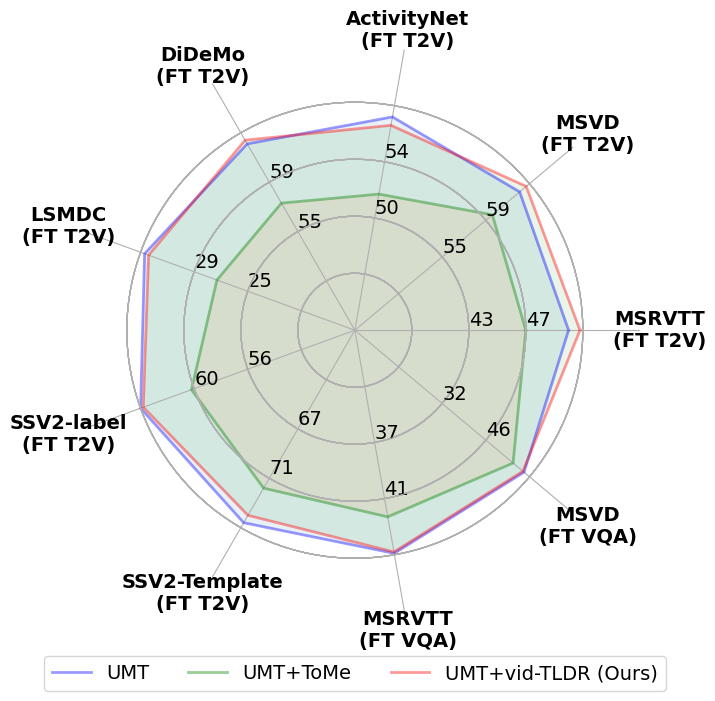

In [22]:
fig = pl.figure(figsize=(6, 6))
titles = ['MSRVTT\n(FT T2V)', 'MSVD\n(FT T2V)', 'ActivityNet\n(FT T2V)', 'DiDeMo\n(FT T2V)', 
          'LSMDC\n(FT T2V)', 'SSV2-label\n(FT T2V)', 'SSV2-Template\n(FT T2V)',
          'MSRVTT\n(FT VQA)', 'MSVD\n(FT VQA)'] 
labels = [
    ["", 43, 47, ""],
    ["", 55, 59, ""],
    ["", 50, 54, ""],
    ["", 55, 59, ""],
    ["", 25, 29, ""],
    ["", 56, 60, ""],
    ["", 67, 71, ""],
    ["", 37, 41, ""],
    ["", 32, 46, ""],
]
radar = Radar(fig, titles, labels, interval=4, first=[39,51,46,51,21,52,63,33,38])
umt       = [50.0, 62.1, 57.2, 62.1, 32.7, 64.0, 74.6, 44.9, 49.5]
tome      = [47.0, 59.6, 51.7, 57.3, 27.3, 60.2, 71.8, 42.3, 48.5]
ours      = [50.8, 62.7, 56.6, 62.4, 32.4, 63.8, 74.0, 44.8, 49.4]

radar.plot(umt, labels, "-", lw=2, color="b", alpha=0.4, label="UMT") # UMT
radar.plot(tome, labels, "-", lw=2, color="g", alpha=0.4, label="UMT+ToMe") # UMT
radar.plot(ours, labels, "-", lw=2, color="r", alpha=0.4, label="UMT+vid-TLDR (Ours)") # Ours
radar.ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15), fontsize="14")

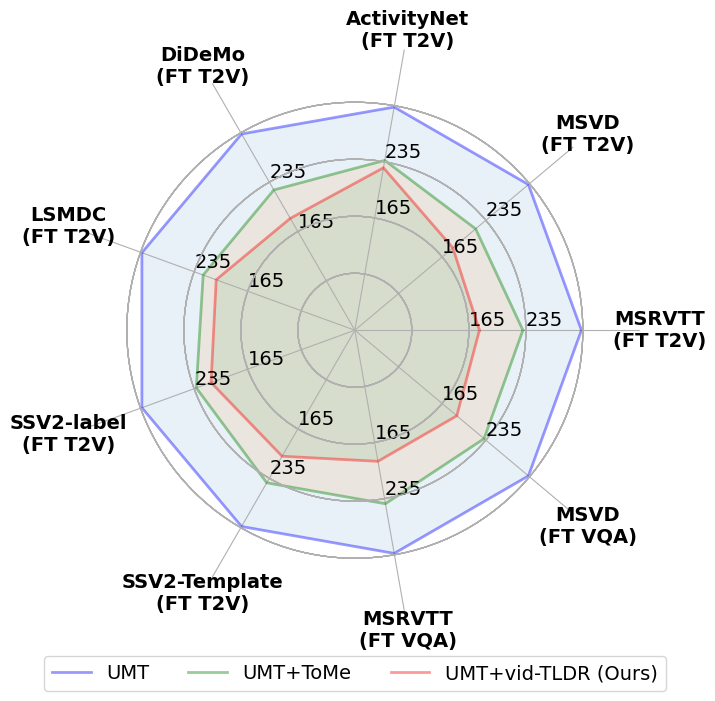

In [23]:
fig = pl.figure(figsize=(6, 6))
titles = ['MSRVTT\n(FT T2V)', 'MSVD\n(FT T2V)', 'ActivityNet\n(FT T2V)', 'DiDeMo\n(FT T2V)', 
          'LSMDC\n(FT T2V)', 'SSV2-label\n(FT T2V)', 'SSV2-Template\n(FT T2V)',
          'MSRVTT\n(FT VQA)', 'MSVD\n(FT VQA)'] 
labels = [
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
    ["", 165, 235, ""],
]
radar = Radar(fig, titles, labels, interval=70, first=95)
umt        = [303.3, 303.3, 303.3, 303.3, 303.3, 303.3, 303.3, 303.3, 303.3]
tome       = [231.4, 218.7, 236.8, 223.9, 223.2, 232.2, 241.4, 241.4, 232.2]
ours       = [178.0, 182.2, 227.6, 183.6, 206.2, 212.9, 203.7, 188.5, 188.5]

radar.plot(umt, labels, "-", lw=2, color="b", alpha=0.4, label="UMT") # UMT
radar.plot(tome, labels, "-", lw=2, color="g", alpha=0.4, label="UMT+ToMe") # UMT
radar.plot(ours, labels, "-", lw=2, color="r", alpha=0.4, label="UMT+vid-TLDR (Ours)") # Ours
radar.ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15), fontsize="14")

In [20]:
from PIL import Image
import numpy as np
acc = np.array(Image.open("acc.png"))
flop = np.array(Image.open("flop.png"))
merge = np.zeros((acc.shape[0]+flop.shape[0], acc.shape[1], 4), dtype=np.uint8)
merge[:acc.shape[0]] = acc
merge[acc.shape[0]:] = flop
Image.fromarray(merge).save("merge.png")


In [21]:
from PIL import Image
import numpy as np
acc = np.array(Image.open("acc.png"))
flop = np.array(Image.open("flop.png"))
merge = np.zeros((acc.shape[0], acc.shape[1]+flop.shape[1], 4), dtype=np.uint8)
merge[:, :acc.shape[1]] = acc
merge[:, acc.shape[1]:] = flop
Image.fromarray(merge).save("merge.png")
